In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


clients = pd.read_csv('/Users/Ysrrael/Documents/Ruben/Proy_Final_Sprint_14/4-Proyecto Final/telecom_clients_us.csv')
dataset = pd.read_csv('/Users/Ysrrael/Documents/Ruben/Proy_Final_Sprint_14/4-Proyecto Final/telecom_dataset_us.csv')

# Cambio tipo de datos en 'clients'

clients['user_id'] = clients['user_id'].astype(object)
clients['date_start'] = pd.to_datetime(clients['date_start'])

# Cambio tipo de datos en 'dataset'

dataset['user_id'] = dataset['user_id'].astype(object)
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.tz_localize(None)
dataset['operator_id'] = dataset['operator_id'].astype(object)
dataset['is_missed_call'] = dataset['is_missed_call'].astype(object)




In [3]:
data = pd.merge(dataset, clients, on='user_id')
data['wait_time'] = data['total_call_duration'] - data['call_duration']
print(data)

      user_id       date direction internal operator_id is_missed_call  \
0      166377 2019-08-04        in    False         NaN           True   
1      166377 2019-08-05       out     True    880022.0           True   
2      166377 2019-08-05       out     True    880020.0           True   
3      166377 2019-08-05       out     True    880020.0          False   
4      166377 2019-08-05       out    False    880022.0           True   
...       ...        ...       ...      ...         ...            ...   
53897  168606 2019-11-10       out     True    957922.0           True   
53898  168606 2019-11-11       out     True    957922.0          False   
53899  168606 2019-11-15       out     True    957922.0          False   
53900  168606 2019-11-15       out     True    957922.0          False   
53901  168606 2019-11-19        in    False         NaN           True   

       calls_count  call_duration  total_call_duration tariff_plan date_start  \
0                2            

In [4]:
print(data.describe())

                                date   calls_count  call_duration  \
count                          53902  53902.000000   53902.000000   
mean   2019-10-23 01:00:32.191755264     16.451245     866.684427   
min              2019-08-02 00:00:00      1.000000       0.000000   
25%              2019-10-04 00:00:00      1.000000       0.000000   
50%              2019-10-28 00:00:00      4.000000      38.000000   
75%              2019-11-14 00:00:00     12.000000     572.000000   
max              2019-11-28 00:00:00   4817.000000  144395.000000   
std                              NaN     62.917170    3731.791202   

       total_call_duration                     date_start     wait_time  
count         53902.000000                          53902  53902.000000  
mean           1157.133297  2019-09-09 00:51:19.188155904    290.448870  
min               0.000000            2019-08-01 00:00:00      0.000000  
25%              47.000000            2019-08-19 00:00:00     17.000000  
50%     

La desviación estándar significativa en el número de llamadas y su duración indica una gran dispersión en los datos. Esto sugiere que hay tanto operadores con un volumen de llamadas muy bajo como otros con un volumen extremadamente alto.
El tiempo de espera promedio de casi 5 minutos por llamada es considerablemente alto. Esto sugiere que los clientes están experimentando tiempos de espera excesivos antes de ser atendidos.
La diferencia significativa entre los percentiles 75 y el valor máximo indica que la distribución de los datos está sesgada hacia la derecha. Esto significa que hay un pequeño número de llamadas que tienen una duración y un volumen de llamadas extremadamente altos, lo que podría estar afectando el promedio.

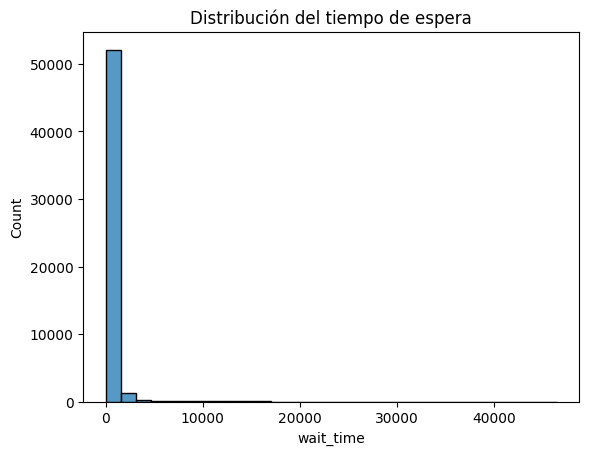

In [5]:
# Exploración visual
# Histograma del tiempo de espera
sns.histplot(data['wait_time'], bins=30)
plt.title('Distribución del tiempo de espera')
plt.show()



In [6]:
data_user= data.groupby('user_id')['wait_time'].sum().reset_index()
print(data_user)

     user_id  wait_time
0     166377      77884
1     166391        669
2     166392       4147
3     166399        587
4     166405     328518
..       ...        ...
302   168583        997
303   168598        784
304   168601      10789
305   168603        401
306   168606        571

[307 rows x 2 columns]


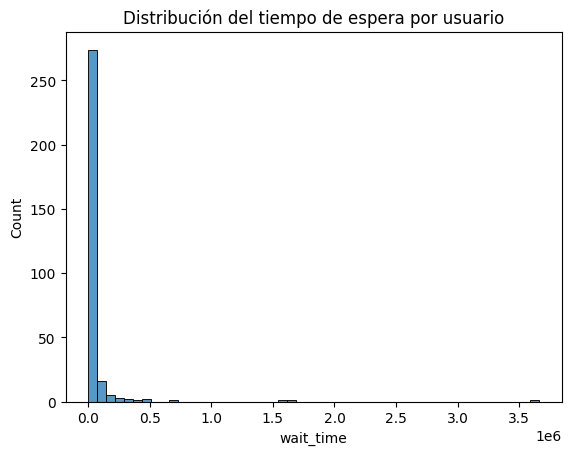

In [7]:
sns.histplot(data_user['wait_time'], bins=50)
plt.title('Distribución del tiempo de espera por usuario')
plt.show()

__Metricas de Ineficiencia:__

1- Tasa de llamadas perdidas internas y externas.

2- Tiempo de espera prolongado para llamadas entrantes.

3- Número reducido de llamadas salientes.  

__1.- Tasa de llamadas perdidas__

     operator_id  is_missed_call
0       879896.0              50
1       879898.0             100
2       880020.0               7
3       880022.0              33
4       880026.0              94
..           ...             ...
871     972408.0               2
872     972410.0               2
873     972412.0               2
874     972460.0               3
875     973120.0               1

[876 rows x 2 columns]


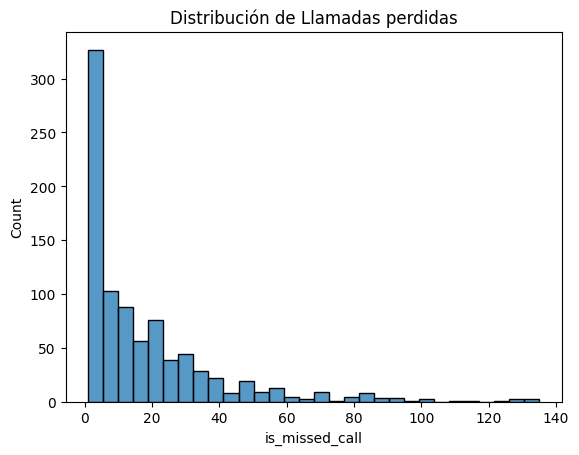

Promedio de llamadas perdidas:  17.71


In [8]:
data_miss_call = data[data['is_missed_call'] == True] 
data_miss_call = data_miss_call.groupby('operator_id')['is_missed_call'].count().reset_index()
print(data_miss_call)

sns.histplot(data_miss_call['is_missed_call'], bins=30)
plt.title('Distribución de Llamadas perdidas')
plt.show()

print('Promedio de llamadas perdidas: ', data_miss_call['is_missed_call'].mean().round(2))

Se tienen 876 operadores con un promedio de 18 llamadas perdidas.

__2- Tiempo de espera prolongadado para llamadas entrantes__

Para calcular este tipo de metrica debemos conocer cuanto es el tiempo de espera aceptable para que una llamada no se pierda. De acuerdo con el sitio https://www.voxco.com/hold-time/, el  tiempo de espera promedio en una llamada es de 2 minutos o 120 segundos.

     operator_id  wait_time
0       879896.0      11373
1       879898.0     111475
2       880022.0       2829
3       880026.0      17808
4       880028.0      44343
..           ...        ...
614     970254.0        270
615     971102.0       1334
616     972410.0       1498
617     972412.0       1025
618     972460.0        635

[619 rows x 2 columns]


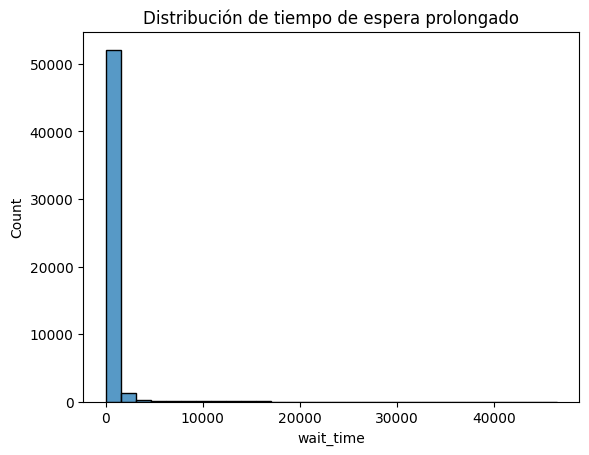

Promedio de tiempo de espera prolongado:  21357.37


In [9]:
data_wait_time = data[data['wait_time'] > 120] 
data_wait_time = data_wait_time.groupby('operator_id')['wait_time'].sum().reset_index()
print(data_wait_time)

sns.histplot(data['wait_time'], bins=30)
plt.title('Distribución de tiempo de espera prolongado')
plt.show()

print('Promedio de tiempo de espera prolongado: ', data_wait_time['wait_time'].mean().round(2))

619 operadores poseen un tiempo de espera pronlongado.

          date  wait_time
0   2019-08-02        330
1   2019-08-03        492
2   2019-08-04         39
3   2019-08-05       2102
4   2019-08-06       2577
..         ...        ...
114 2019-11-24      86934
115 2019-11-25     335179
116 2019-11-26     313706
117 2019-11-27     255794
118 2019-11-28     251094

[119 rows x 2 columns]
Promedio de tiempo de espera:  131561.0


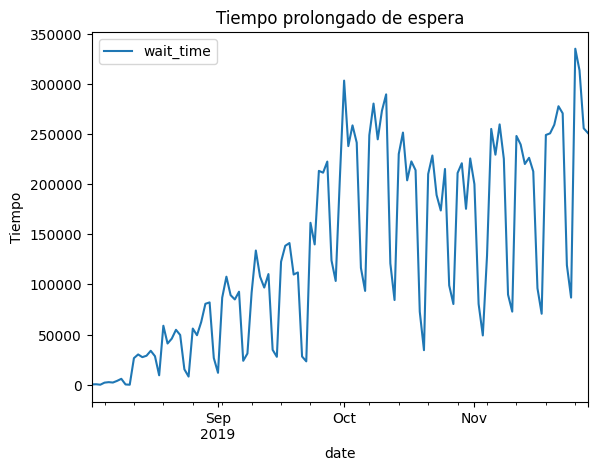

In [10]:
period = data.groupby('date')['wait_time'].sum().reset_index()

print(period)
period.plot(x='date',y='wait_time', title='Tiempo prolongado de espera', ylabel='Tiempo')

print('Promedio de tiempo de espera: ', period['wait_time'].mean().round())

__3- Número reducido de llamadas salientes__

Consideraremos las llamadas salientes que no sean internas.

In [11]:
# llamadas salientes (direction) que la columna internal sea False

data_reduce_calls = data[(data['direction'] == 'out') & (data['internal'] == False)]

print(data_reduce_calls)

      user_id       date direction internal operator_id is_missed_call  \
4      166377 2019-08-05       out    False    880022.0           True   
5      166377 2019-08-05       out    False    880020.0          False   
6      166377 2019-08-05       out    False    880020.0           True   
8      166377 2019-08-05       out    False    880020.0           True   
10     166377 2019-08-06       out    False    881278.0           True   
...       ...        ...       ...      ...         ...            ...   
53887  168603 2019-11-21       out    False    959118.0          False   
53888  168603 2019-11-27       out    False    959118.0          False   
53890  168606 2019-11-08       out    False    957922.0           True   
53892  168606 2019-11-08       out    False    957922.0          False   
53895  168606 2019-11-09       out    False    957922.0          False   

       calls_count  call_duration  total_call_duration tariff_plan date_start  \
4                3            

De acuerdo con el sitio https://www.efficy.com/es/agentes-call-center/ Indica que el número de llamadas que se hacen promedio diario es de 46 llamadas.

In [12]:
reduce_calls = data_reduce_calls.groupby(['date','operator_id'])['calls_count'].sum().reset_index()

reduce_calls = reduce_calls[reduce_calls['calls_count'] < 46]

print(reduce_calls)
print('Número de operadores con menos de 46 llamadas diarias: ', reduce_calls['operator_id'].nunique())

            date  operator_id  calls_count
0     2019-08-02     879896.0           11
1     2019-08-02     879898.0            5
2     2019-08-03     879896.0           10
3     2019-08-03     879898.0           15
4     2019-08-04     879896.0            2
...          ...          ...          ...
13775 2019-11-28     970250.0            1
13776 2019-11-28     970252.0            7
13777 2019-11-28     970254.0            6
13778 2019-11-28     970258.0            1
13780 2019-11-28     972412.0           34

[10589 rows x 3 columns]
Número de operadores con menos de 46 llamadas diarias:  794


Existen un totla de 794 operadores que realizan menos de 46 llamadas diarias.

date
2019-08-02      16
2019-08-03      25
2019-08-04       2
2019-08-05      47
2019-08-06      17
              ... 
2019-11-24     625
2019-11-25    2951
2019-11-26    2629
2019-11-27    2962
2019-11-28    2829
Name: calls_count, Length: 118, dtype: int64


<Axes: title={'center': 'Llamadas totales diarias'}, xlabel='date', ylabel='Número de llamadas'>

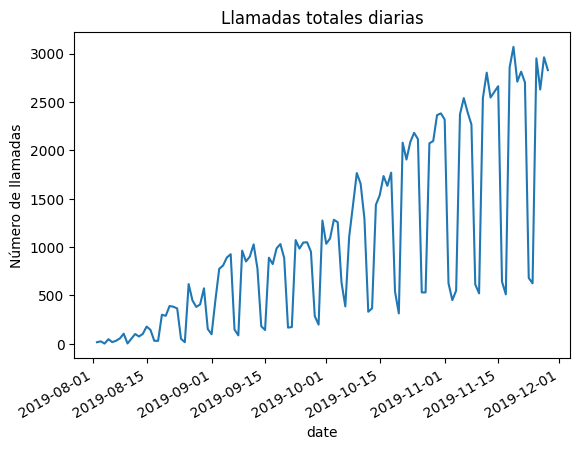

In [13]:
reduce_calls_graph = reduce_calls.groupby('date')['calls_count'].sum()

print(reduce_calls_graph)

reduce_calls_graph.plot(x='date',y='calls_count', title='Llamadas totales diarias', ylabel='Número de llamadas')


__Prueba de Hipótesis estadísticas__

__Llamadas Perdidas:__
- Hipótesis Nula (H₀): No existe una diferencia significativa en el número de llamadas perdidas entre los operadores considerados eficientes y los considerados ineficientes.

- Hipótesis Alternativa (H₁): Los operadores considerados ineficientes tienen un número significativamente mayor de llamadas perdidas en comparación con los operadores eficientes.

In [14]:
alpha = 0.05
avg_missed_calls = 18
h_missed_calls = st.ttest_1samp(data_miss_call['is_missed_call'], avg_missed_calls)

print(h_missed_calls.pvalue)

if h_missed_calls.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')    

0.692050109546267
No podemos rechazar la hipótesis nula


No podemos rechazar la hipotesis nula por lo que no existe una diferencia significativa en el número de llamadas perdidas entre los operadores considerados eficientes y los considerados ineficientes.

__Tiempo de espera prolongado__

- Hipótesis Nula (H₀): No existe una diferencia significativa en el tiempo de espera promedio para las llamadas entrantes entre los operadores considerados eficientes y los considerados ineficientes.

- Hipótesis Alternativa (H₁): Los operadores considerados ineficientes tienen un tiempo de espera promedio significativamente mayor para las llamadas entrantes en comparación con los operadores eficientes.

In [15]:
avg_wait_time = 21357
h_wait_time = st.ttest_1samp(data_wait_time['wait_time'], avg_wait_time)

print(h_wait_time.pvalue)

if h_wait_time.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula') 

0.9999220389211687
No podemos rechazar la hipótesis nula


No podemos rechazar la hipótesis nula por lo que no existe una diferencia significativa en el tiempo de espera promedio para las llamadas entrantes entre los operadores considerados eficientes y los considerados ineficientes.

__Número reducido de llamadas salientes__

- Hipótesis Nula (H₀): No existe una diferencia significativa en el número de llamadas salientes realizadas entre los operadores considerados eficientes y los considerados ineficientes.

- Hipótesis Alternativa (H₁): Los operadores considerados ineficientes realizan un número significativamente menor de llamadas salientes en comparación con los operadores eficientes.

In [16]:
min_calls_per_day = 46
h_calls_out = st.ttest_1samp(reduce_calls_graph, min_calls_per_day)

print(h_calls_out.pvalue)

if h_calls_out.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

6.495978488930676e-22
Rechazamos la hipótesis nula


Rechazamos la hipótesis nula por lo que Los operadores considerados ineficientes realizan un número significativamente menor de llamadas salientes en comparación con los operadores eficientes.

__Conclusión__

*Basados en los resultados de las pruebas de hipótesis estadísticas realizadas, podemos concluir que:
Si bien no encontramos evidencia estadísticamente significativa para afirmar que los operadores considerados ineficientes tienen un mayor número de llamadas perdidas o tiempos de espera más prolongados en comparación con los operadores eficientes, sí existe una diferencia estadísticamente significativa en el número de llamadas salientes realizadas. Los operadores clasificados como ineficientes realizan un número considerablemente menor de llamadas salientes en comparación con aquellos considerados eficientes.*

*Los resultados obtenidos sugieren que, aunque el número de llamadas perdidas y los tiempos de espera no sean los mejores indicadores de eficiencia en este caso particular, el número de llamadas salientes sí lo es. Al enfocarse en mejorar el desempeño de los operadores en este aspecto, la empresa podrá optimizar sus procesos y mejorar la calidad del servicio al cliente.*

*Es importante destacar que estas conclusiones se basan en los datos analizados y en las hipótesis planteadas. Para obtener una visión más completa, se recomienda realizar análisis adicionales y considerar otros factores que puedan influir en el desempeño de los operadores.*
